In [1]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [2]:
coinsAGood = coins[coins['Mint_State'] == 'AGood']
coinsAGood = coinsAGood[['Denom', 'Year', 'Value']]

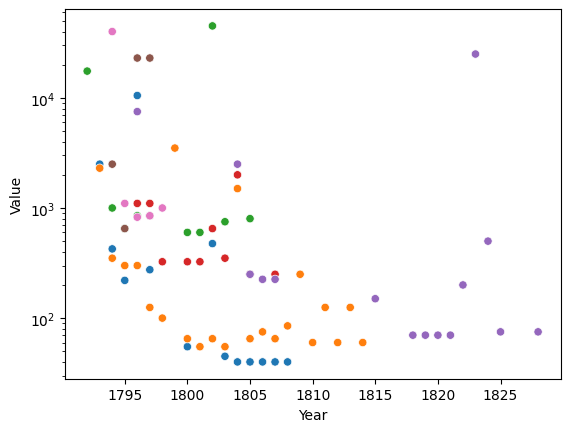

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsAGood, hue='Denom', legend=False)
plt.yscale('log')

In [4]:
import pandas as pd

df = pd.DataFrame(coinsAGood)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
           Denom  Year    Value
0       HalfCent  1793   2500.0
21      HalfCent  1796  10500.0
254    LargeCent  1793   2300.0
291    LargeCent  1799   3500.0
2932    HalfDime  1792  17500.0
2995    HalfDime  1802  45000.0
4644     Quarter  1796   7500.0
4653     Quarter  1804   2500.0
4743     Quarter  1823  25000.0
5957  HalfDollar  1794   2500.0
5971  HalfDollar  1796  23000.0
5978  HalfDollar  1797  23000.0
7250      Dollar  1794  40000.0


In [5]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([   0,   21,  254,  291, 2932, 2995, 4644, 4653, 4743, 5957, 5971,
       5978, 7250])

In [6]:
for i in indicies:
  coinsAGood = coinsAGood.drop(i)

In [7]:
coinsAGood

,Denom,Year,Value
7,HalfCent,1794,425.0
14,HalfCent,1795,220.0
28,HalfCent,1797,275.0
35,HalfCent,1800,55.0
42,HalfCent,1802,475.0
...,...,...,...
5964,HalfDollar,1795,650.0
7258,Dollar,1795,1100.0
7266,Dollar,1796,825.0
7274,Dollar,1797,850.0


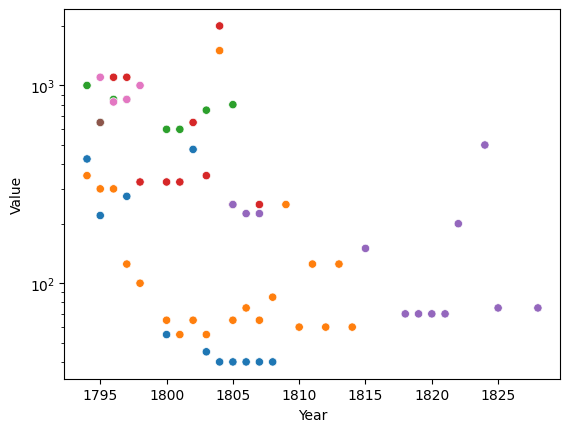

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsAGood, hue='Denom', legend=False)
plt.yscale('log')

In [9]:
from sklearn.preprocessing import LabelEncoder
lencDenom = LabelEncoder()
coinsAGood["Denom"] = lencDenom.fit_transform(coinsAGood["Denom"])
coinsAGood["Denom"]

7       2
14      2
28      2
35      2
42      2
       ..
5964    4
7258    1
7266    1
7274    1
7282    1
Name: Denom, Length: 66, dtype: int64

In [10]:
coinsAGood['log_Value'] = np.log(coinsAGood['Value'])

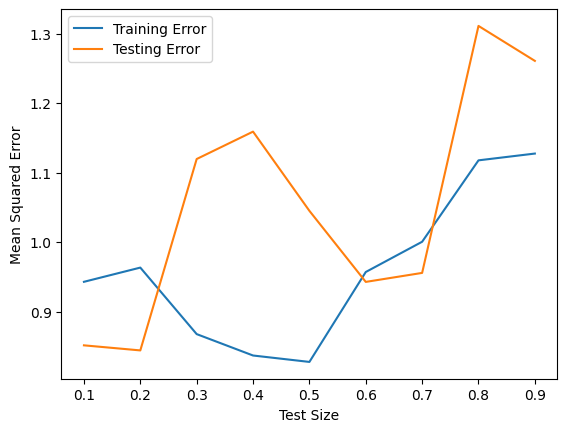

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsAGood.iloc[:,0:2]
y = coinsAGood.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = coinsAGood.iloc[:,0:2]
Y = coinsAGood.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=0)

In [13]:
X

,Denom,Year
7,2,1794
14,2,1795
28,2,1797
35,2,1800
42,2,1802
...,...,...
5964,4,1795
7258,1,1795
7266,1,1796
7274,1,1797


In [14]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [15]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [16]:
mseModel1

45656.18122008798

In [17]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.07979738 -0.03651474]
Intercept: 71.30920616327646


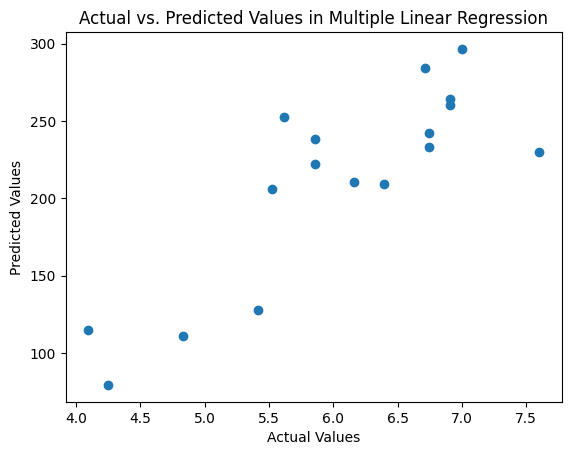

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

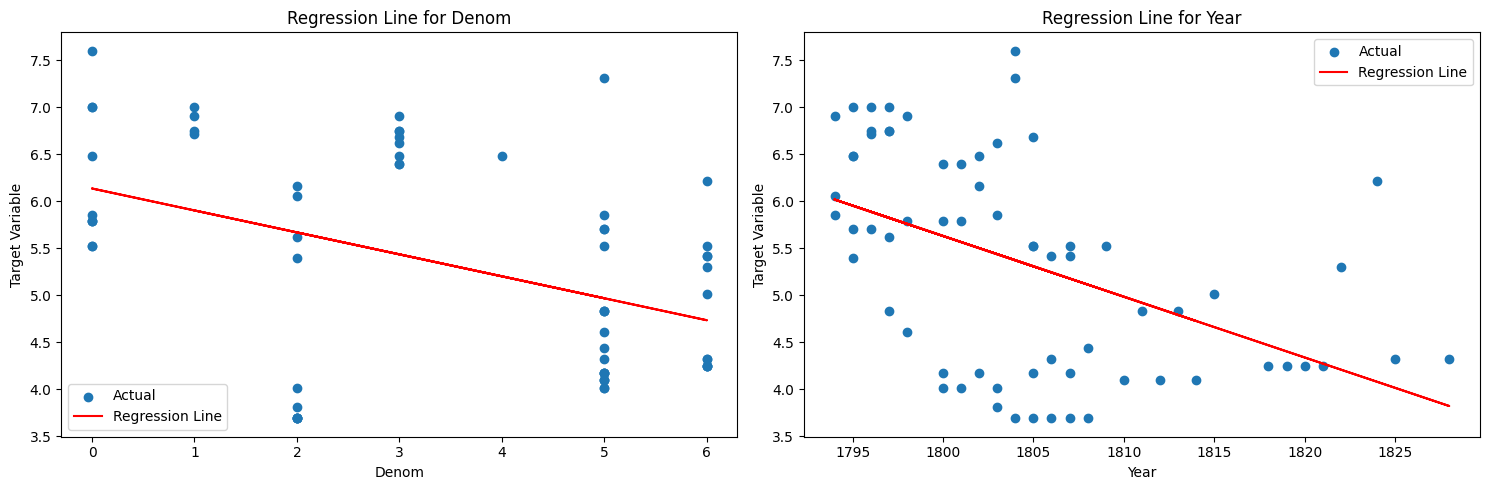

In [19]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [20]:
coinsAGood[coinsAGood['Denom'] == 7]

,Denom,Year,Value,log_Value


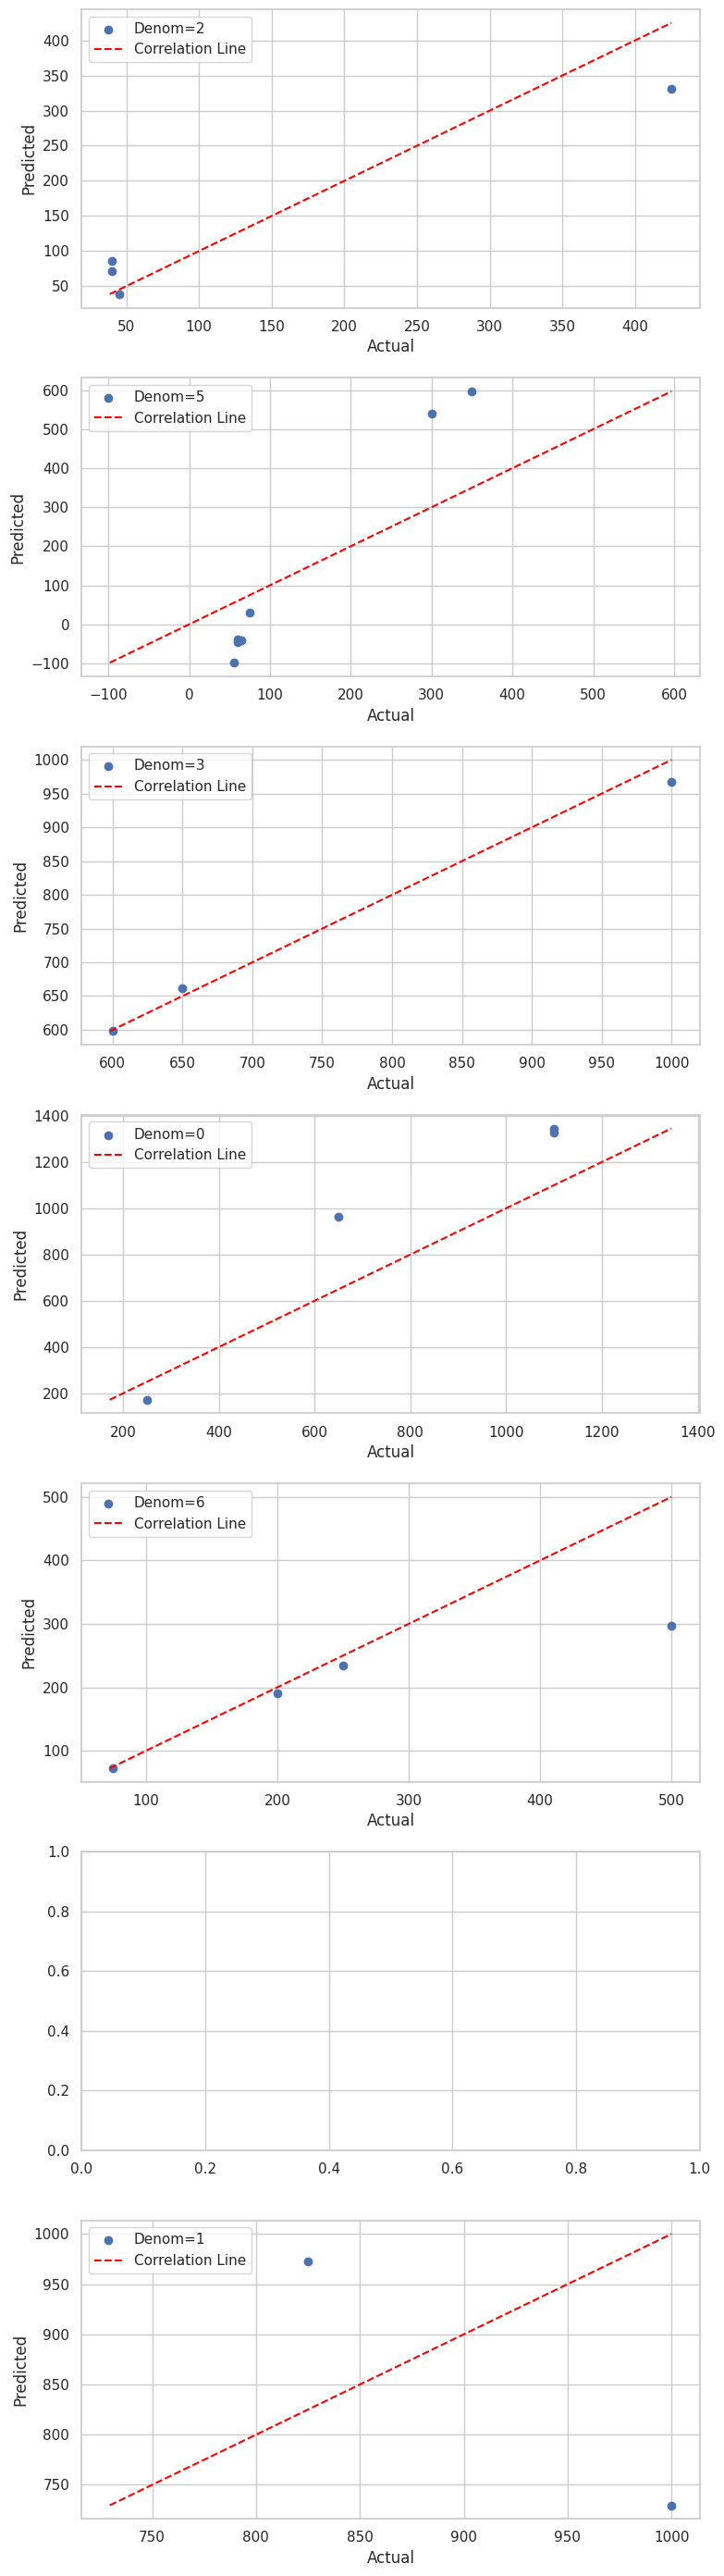

In [35]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsAGood.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsAGood['Value']  # Specify the column name of your target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsAGood[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsAGood[coinsAGood[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

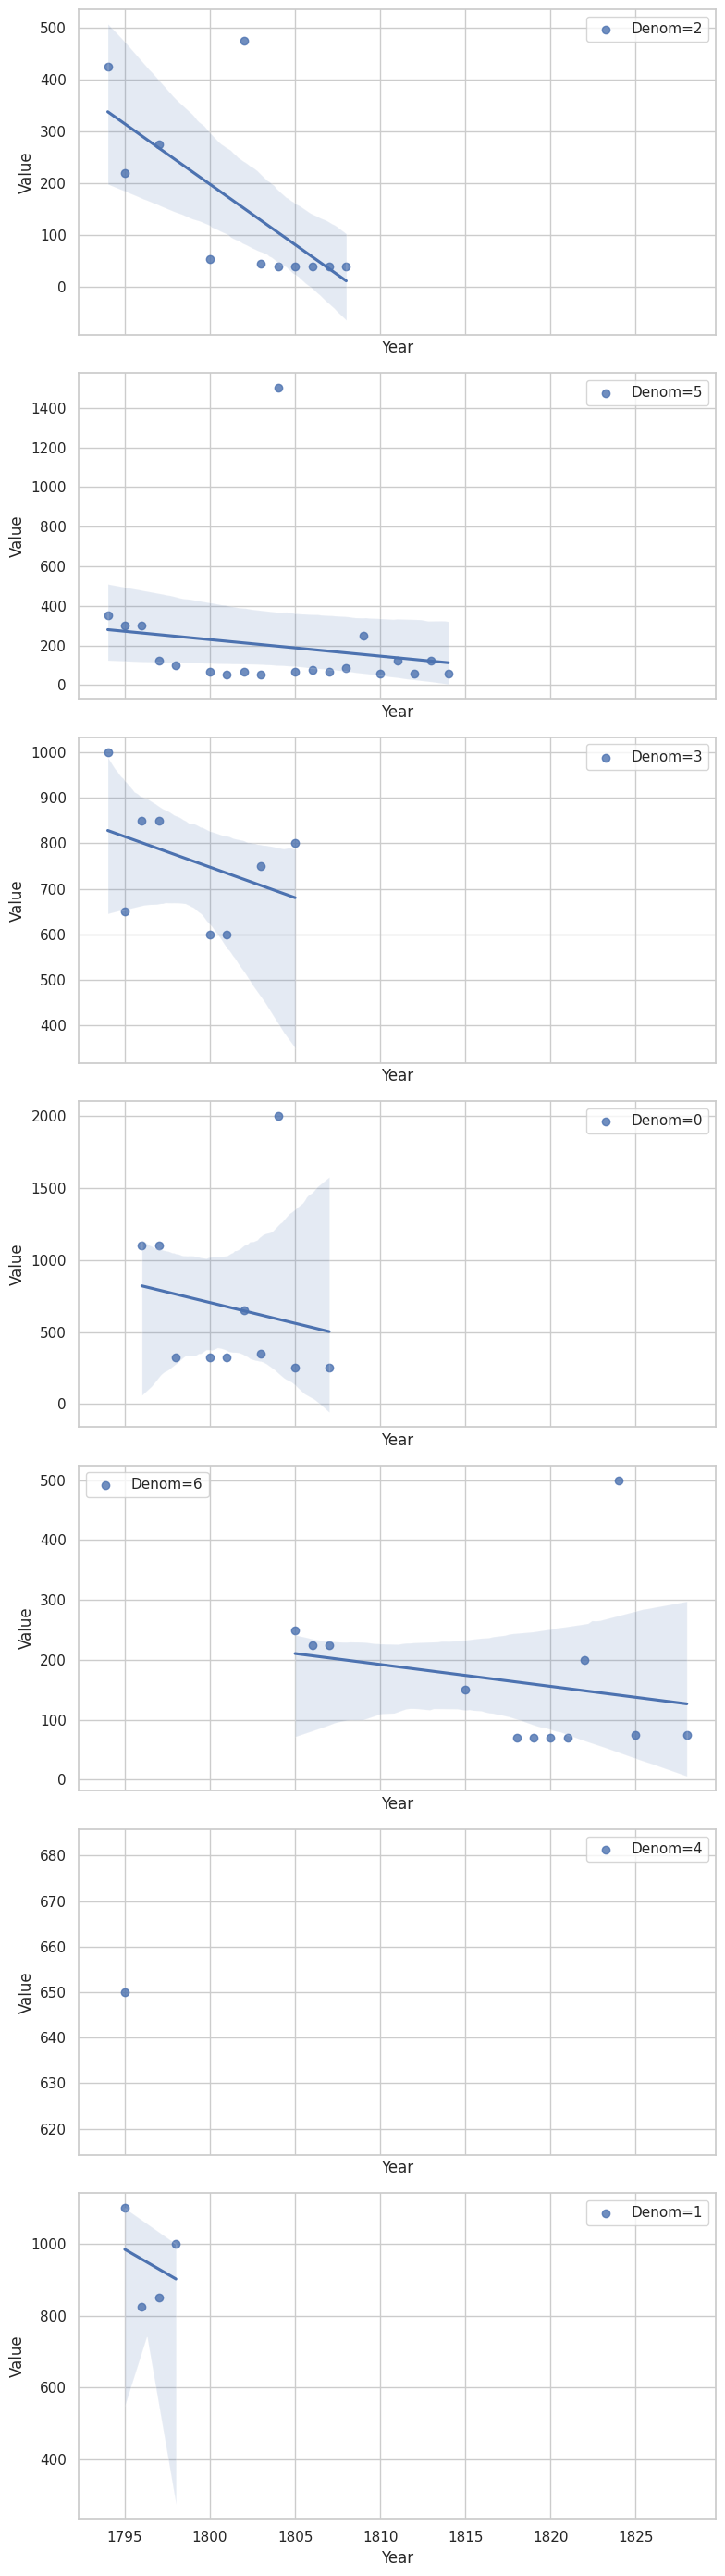

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsAGood[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsAGood[coinsAGood[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.669339  -0.785647
Value        NaN -0.669339  1.000000   0.974713
log_Value    NaN -0.785647  0.974713   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.162654  -0.345375
Value        NaN -0.162654  1.000000   0.872412
log_Value    NaN -0.345375  0.872412   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.379248  -0.344808
Value        NaN -0.379248  1.000000   0.996883
log_Value    NaN -0.344808  0.996883   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.181111  -0.363736
Value        NaN -0.181111  1.000000   0.964708
log_Value    NaN -0.363736  0.964708   1.000000
           Denom      Year     Value  lo

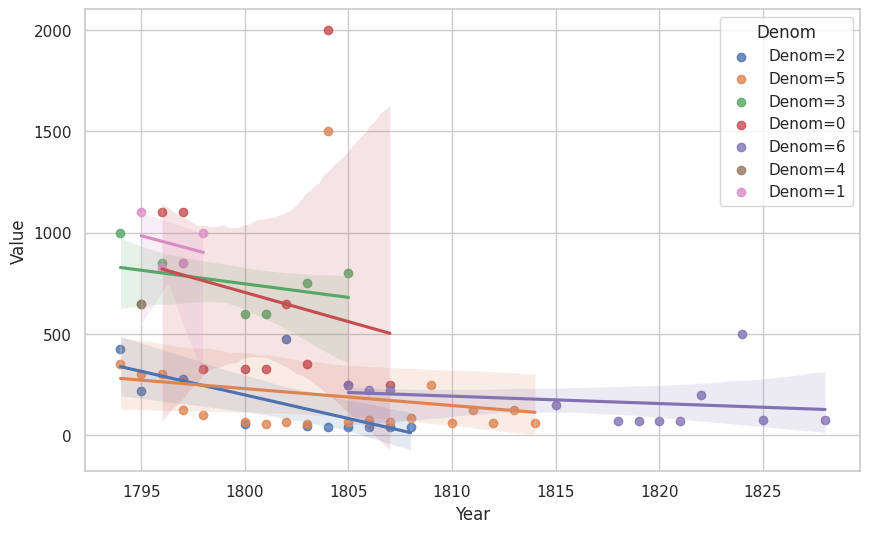

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsAGood[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsAGood[coinsAGood[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [25]:
overall_correlation_matrix = coinsAGood.corr()
overall_correlation_matrix

,Denom,Year,Value,log_Value
Denom,1.000000,0.542176,-0.452757,-0.435410
Year,0.542176,1.000000,-0.412205,-0.479829
Value,-0.452757,-0.412205,1.000000,0.891063
log_Value,-0.435410,-0.479829,0.891063,1.000000


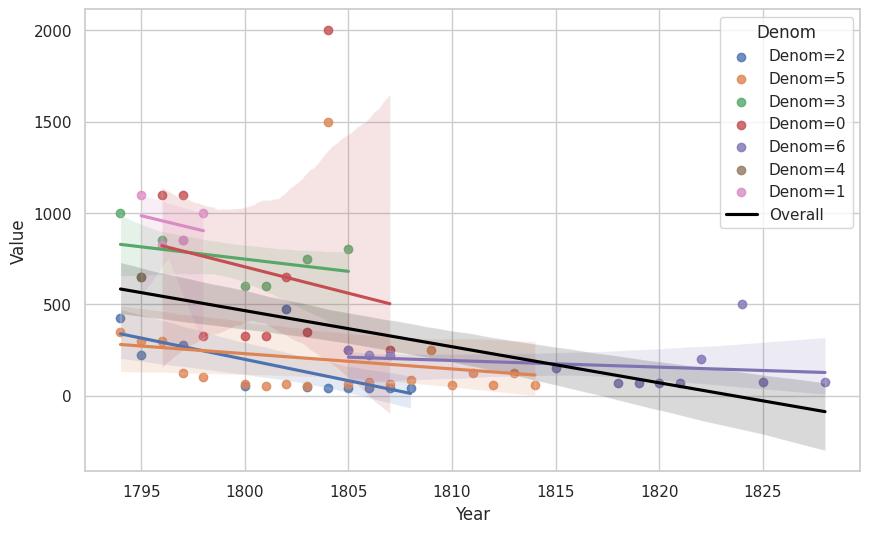

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsAGood[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsAGood[coinsAGood[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsAGood[attribute_column], y=coinsAGood[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()